original data:
[ 99.  48. -98. ... 126. 146. 114.]
[ 99.0763579  -11.74844871 -88.96150666 ... 113.55489624 151.18996086
 113.88095509]


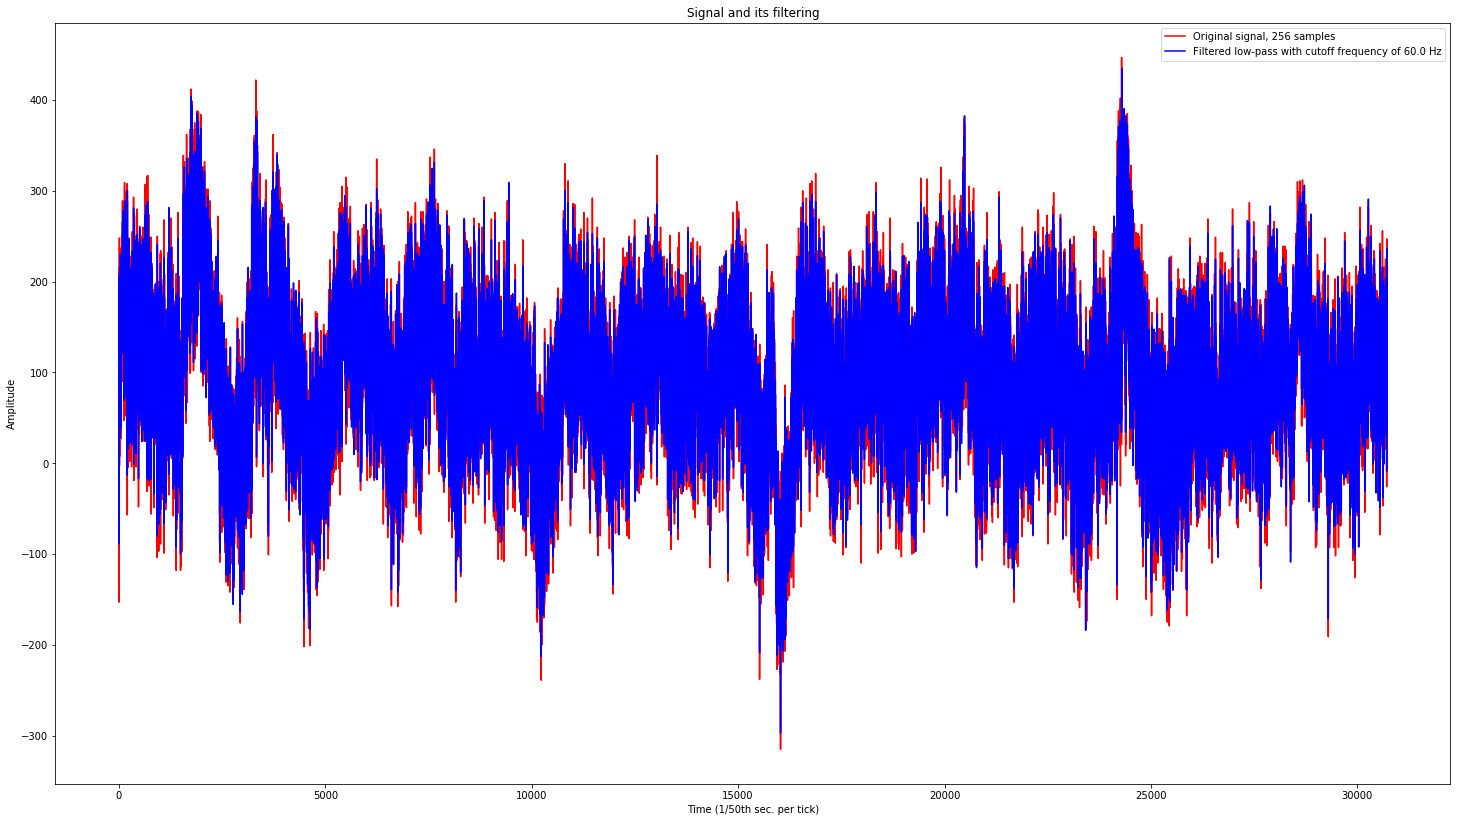

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated function get_active_sheet (Use the .active property).


30720
file saved!!


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from scipy import signal
import openpyxl


loc=(r'C:/Users/etudiant/Downloads/Music/Music/M09.xlsx')
df = pd.read_excel(loc, sheet_name='Sheet1')# Reading the excel file

x=[]
for i in df.index:
    
    x=np.append(x,df['F3'][i])
print("original data:")
print(x)

C=5

sample_rate=256
# function for the 
def butter_lowpass(cutoff, nyq_freq, order=5):
    normal_cutoff = float(cutoff) / nyq_freq
    b, a = signal.butter(order, normal_cutoff, btype='lowpass')
    return b, a

def butter_lowpass_filter(x, cutoff_freq, nyq_freq, order=5):
    b, a = butter_lowpass(cutoff_freq, nyq_freq, order=order)
    y = signal.filtfilt(b, a, x)
    return y

# Filter signal x, result stored to y: 
cutoff_frequency = 60.0
y = butter_lowpass_filter(x, cutoff_frequency, sample_rate/2)

# Difference acts as a special high-pass from a reversed butterworth filter. 
diff = np.array(x)-np.array(y)

print(y)
# Visualize
plt.figure(figsize=(25, 14))
plt.plot(x, color='red', label="Original signal, {} samples".format(sample_rate))
plt.plot(y, color='blue', label="Filtered low-pass with cutoff frequency of {} Hz".format(cutoff_frequency))
#plt.plot(diff, color='gray', label="What has been removed")
plt.title("Signal and its filtering")
plt.xlabel('Time (1/50th sec. per tick)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()
#fig = plt.figure()
#fig.savefig('plot.png')


w=openpyxl.load_workbook(loc)
sheet=w.get_active_sheet()
size=y.size
print(size)

#Saving the filtered data into the excel file 
for i in range(0,size):
    sheet.cell(row=(1),column=C).value="FILTERED DATA "
    sheet.cell(row=(i+2),column=C).value=y[i]
    
w.save(loc)
print('file saved!!')



In [118]:
import numpy as np
import openpyxl
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from scipy import signal

df = pd.read_excel('G:\music_data\M01\SONG_1\M01_C4.xlsx', sheetname='Sheet1')

x=[]
for i in df.index:
    x=np.append(x,df['C3'][i])
print("original data:")
print(x.shape)

df = pd.DataFrame({'a':x})

writer = ExcelWriter('G:\music_data\M01\SONG_1\M01_F4.xlsx')
df.to_excel(writer,'Sheet2',index=False)
writer.save()

C:\Users\hp\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


original data:
(30720,)
